# Initail install requirement

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
!pip install -U openmim
!mim install mmengine
!mim install "mmcv>=2.0.0"
!mim install mmdet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.3/51.3 kB 5.8 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 374.3/374.3 kB 8.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.3/250.3 kB 24.9 MB/s eta 0:00:00
  Attempting uninstall: platformdirs
    Found existing installation: platformdirs 3.3.0
    Uninstalling platformdirs-3.3.0:
      Successfully uninstalled platformdirs-3.3.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in links: https://download.openmmlab.com/mmcv/dist/cu118/torch2.0.0/index.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.4/74.4 MB 9.2 MB/s eta 0:00:00
Looking in indexes: https://pyp

In [ ]:
# %cd drive/MyDrive/centroidtracking

# Import package

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.options.plotting.backend = "plotly"

import cv2
from PIL import Image

import mmcv
from mmdet.apis import init_detector, inference_detector

from tqdm import tqdm

In [ ]:
# Import essential library

# import mmcv
# from mmcv import Config

# from mmdet.apis import set_random_seed

# import copy
# import os.path as osp

# import numpy as np
# import pandas as pd

# from mmdet.datasets import build_dataset
# from mmdet.models import build_detector
# from mmdet.apis import train_detector,inference_detector, show_result_pyplot, init_detector

# import cv2

# import matplotlib.pyplot as plt

# from tqdm import tqdm

# Start detection

In [ ]:
score = 0.1
iou = 0.1
config_file = '/content/drive/MyDrive/centroidtracking/mmdetection/configs/yolox/yolox_x_8xb8-300e_coco.py'
checkpoint_file = '/content/drive/MyDrive/mmdetection/train_yolox_x_on_Sideview-traffic-video-3/epoch_84.pth'

model_config = dict(
        model = dict(
            bbox_head=dict(num_classes=6)
            ,test_cfg=dict(score_thr=score,nms=dict(iou_threshold=iou))
        )
    )

model = init_detector(config_file, checkpoint_file, device='cuda:0',cfg_options=model_config)

Loads checkpoint by local backend from path: /content/drive/MyDrive/mmdetection/train_yolox_x_on_Sideview-traffic-video-3/epoch_84.pth
The model and loaded state dict do not match exactly

unexpected key in source state_dict: ema_backbone_stem_conv_conv_weight, ema_backbone_stem_conv_bn_weight, ema_backbone_stem_conv_bn_bias, ema_backbone_stem_conv_bn_running_mean, ema_backbone_stem_conv_bn_running_var, ema_backbone_stem_conv_bn_num_batches_tracked, ema_backbone_stage1_0_conv_weight, ema_backbone_stage1_0_bn_weight, ema_backbone_stage1_0_bn_bias, ema_backbone_stage1_0_bn_running_mean, ema_backbone_stage1_0_bn_running_var, ema_backbone_stage1_0_bn_num_batches_tracked, ema_backbone_stage1_1_main_conv_conv_weight, ema_backbone_stage1_1_main_conv_bn_weight, ema_backbone_stage1_1_main_conv_bn_bias, ema_backbone_stage1_1_main_conv_bn_running_mean, ema_backbone_stage1_1_main_conv_bn_running_var, ema_backbone_stage1_1_main_conv_bn_num_batches_tracked, ema_backbone_stage1_1_short_conv_conv_weig

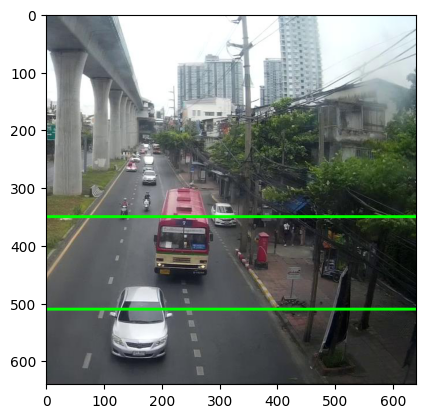

In [ ]:
img_pth = '/content/drive/MyDrive/mmdetection/front-top-traffic-video-4/test/11440_png.rf.d9c42538f4366a5cc8dd788c58c347b0.jpg'
# img_pth = '/content/drive/MyDrive/mmdetection/Sideview-traffic-video-5/test/922_jpg.rf.1688f27efa20c65c7ebf67488e13badf.jpg'

img = plt.imread(img_pth)
# plt.figure(figsize = (20,6))

start = 350
width = 160

start1 = (0, start)
end1 = (640, start)
color = (0, 255, 0)
thickness = 3
img = cv2.line(img, start1, end1, color, thickness)

start2 = (0, start+width)
end2 = (640, start+width)
color = (0, 255, 0)
thickness = 3
img = cv2.line(img, start2, end2, color, thickness)

plt.imshow(img)

In [ ]:
def detect_car(img,model):

  result = inference_detector(model, img).pred_instances
  confidences = result.scores.cpu().numpy().tolist()
  boxes = result.bboxes.cpu().numpy().tolist()

  return boxes, confidences


def extract_centroid(boxes, axis):

  def round_10(n):
    return round(n/10)*10

  centroid=[]
  bbox_w=[]
  for box in boxes:
    if axis==0:
      c = (box[0]+box[2])//2
      w = abs(box[0]-box[2])
    elif axis==1:
      c = (box[1]+box[3])//2
      w = abs(box[1]-box[3])
    c = round_10(c)
    # c = int(c)
    w = int(w)
    centroid.append(c)
    bbox_w.append(w)

  return centroid, bbox_w

In [ ]:
pth = '/content/drive/MyDrive/mmtracking/demo/Top.MOV'
imgs = mmcv.VideoReader(pth)

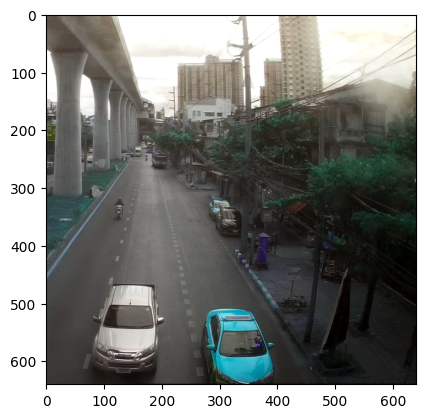

In [ ]:
img = imgs[1_000][80:,640:]
plt.imshow(img)

In [ ]:
cen_x = []
bbox_w = []
confs = []

for i, frame in tqdm(enumerate(imgs), total=len(imgs)):

  frame = frame[80:,640:]
  frame = cv2.resize(frame,(640,640))
  if i%30==0:
    boxes, confidences = detect_car(frame,model)
    x,w = extract_centroid(boxes, axis=1)
    cen_x += x
    bbox_w += w
    confs += confidences

100%|██████████| 122700/122700 [18:14<00:00, 112.12it/s]


In [ ]:
df = pd.DataFrame(data=dict(
    centroid_y = cen_x,
    bbox_width = bbox_w,
    confidence_score = confs
))

In [ ]:
df

,centroid_y,bbox_width,confidence_score
0,280,27,0.841873
1,280,30,0.816522
2,240,31,0.690716
3,270,22,0.627439
4,350,73,0.621034
...,...,...,...
72235,230,106,0.376798
72236,240,79,0.351288
72237,490,70,0.210622
72238,230,13,0.156158


In [ ]:
max_width = int((df['bbox_width'].max())//10*10)
max_width

590

In [ ]:
g = (
    df.groupby(by='centroid_y')
      .agg({'bbox_width':'max', 'confidence_score':'mean'})
      .sort_values(by='centroid_y')
      .reset_index()
)

In [ ]:
g.head(10)

,centroid_y,bbox_width,confidence_score
0,0,9,0.161088
1,10,22,0.161416
2,20,34,0.189237
3,130,250,0.151488
4,140,253,0.154432
5,150,237,0.386810
6,160,276,0.339895
7,170,295,0.423705
8,180,332,0.375753
9,190,346,0.285794


In [ ]:
g.to_csv('/content/drive/MyDrive/mmtracking/demo/topview_find_roi.csv', index=False)

In [ ]:
g.plot(x='centroid_y',y='confidence_score',kind='line')

In [ ]:
def avg_conf(start, max_width, df):
  end = start + max_width
  conf = df.loc[(df['centroid_x']>=start) & (df['centroid_x']<=end),'confidence_score']
  return conf.mean()

In [ ]:
conf_window = []
for idx, row in g.iterrows():
  start = int(row[0])
  if start <= 640-300:
    c = avg_conf(start, max_width, df)
  else:
    c = 0
  conf_window.append(c)

In [ ]:
g['confidence_window'] = conf_window

In [ ]:
g.plot(x='centroid_x',y='confidence_window',kind='line')

In [ ]:
best_start_idx = g['confidence_window'].argmax()

In [ ]:
g.loc[best_start_idx,'centroid_x']

85

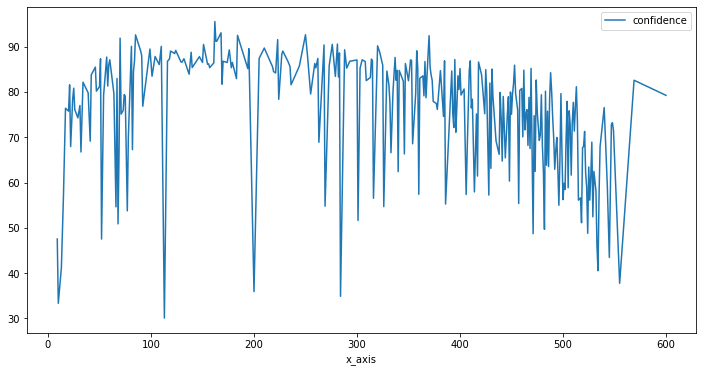

In [ ]:
# (
#     pd.DataFrame(data=zip(x_axis,confs), columns=['x_axis','confidence'])
#     .groupby(by='x_axis')
#     .agg('mean')
#     .reset_index()
#     .assign(confidence=lambda x: x['confidence']*100)
#     .plot(x='x_axis',y='confidence',kind='line',figsize=(12,6))
# )